In [1]:
## This notebook will be used to draw distributions for every interaction map

## plots generated using this notebook are used in Figures 2C, 5A, S4C, S4D, and S4E

In [4]:
## Import modules

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [6]:
## Import data



## gene level maps, generated by the "generateGeneMap" function in the "call_genetic_interactions" notebook
dmso1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso1_map.xlsx', index_col = 0 )
atr_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/atr_map.xlsx', index_col = 0 )
dmso2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso2_map.xlsx', index_col = 0 )
etop_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/etop_map.xlsx', index_col = 0 )
keto_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/keto_map.xlsx', index_col = 0 )

## sgrna level maps, generated by the "calculateInteractions" function in the "call_genetic_interactions" notebook
dmso1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso1_sgmap.xlsx', index_col = 0)
atr_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/atr_sgmap.xlsx', index_col = 0)
dmso2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso2_sgmap.xlsx', index_col = 0)
etop_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/etop_sgmap.xlsx', index_col = 0)
keto_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/keto_sgmap.xlsx', index_col = 0)

##gene table, generated by the "generatePhenotypeMatrix" function in the "call_genetic_interactions" notebook
singles_table = pd.read_excel('/Users/benh/Desktop/GI_data/singles_tables/singles_table.xlsx',index_col = 0)

In [7]:
## Define two color maps one for GI/eGI maps and one for dGI maps


gi_colors = ['mediumturquoise','dimgray','gold']
gi_cmap = mcolors.LinearSegmentedColormap.from_list('gi_cmap',gi_colors)


di_colors = ['#7fb45c','dimgray','#b897e3']
di_cmap = mcolors.LinearSegmentedColormap.from_list('di_cmap',di_colors)


In [8]:
## Define functions

##Import Max's handy upperTriangle function to avoid counting AB BA GIs twice
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(future_stack=True).loc[keep]

def interaction_hist(gimap,negmap,cmap,no_bins):
    plt.figure(figsize=(5,5))
    plt.xlim(-20,20)
    counts,bins = np.histogram(upperTriangle(gimap),bins = no_bins,range=(-20,20))
    ntc_counts,ntc_bins = np.histogram(negmap,bins= no_bins,range=(-20,20))
    bin_centers = 0.5*(bins[:-1]+bins[1:])
    ntc_bin_centers = 0.5*(ntc_bins[:-1]+ntc_bins[1:])
    norm = Normalize(vmin = -10,vmax = 10)
    colors = cmap(norm(bin_centers))
    plt.bar(bin_centers,np.log10(counts+1),width = bins[1]-bins[0],color = colors)
    plt.bar(ntc_bin_centers,np.log10(ntc_counts+1),width = ntc_bins[1] - ntc_bins[0],color='lightcoral')
    
    

In [9]:
## Fill nan values in the map with zeros

dmso1_map = dmso1_map.fillna(0)
atr_map = atr_map.fillna(0)
dmso2_map = dmso2_map.fillna(0)
etop_map = etop_map.fillna(0)
keto_map = keto_map.fillna(0)

dmso1_sgmap = dmso1_sgmap.fillna(0)
atr_sgmap = atr_sgmap.fillna(0)
dmso2_sgmap = dmso2_sgmap.fillna(0)
etop_sgmap = etop_sgmap.fillna(0)
keto_sgmap = keto_sgmap.fillna(0)

In [10]:
## Use sgmaps to define population of gene-ntc interactions by averaging along one axis

dmso1_map_geneneg =  dmso1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  :].T.groupby(singles_table['gene']).mean()
atr_map_geneneg =  atr_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  :].T.groupby(singles_table['gene']).mean()
dmso2_map_geneneg =  dmso2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  :].T.groupby(singles_table['gene']).mean()
etop_map_geneneg =  etop_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  :].T.groupby(singles_table['gene']).mean()
keto_map_geneneg =  keto_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  :].T.groupby(singles_table['gene']).mean()



In [16]:
dmso1_map_geneneg

,non-targeting_00067,non-targeting_00219,non-targeting_00234,non-targeting_00460,non-targeting_00564,non-targeting_00650,non-targeting_00752,non-targeting_00980,non-targeting_01095,non-targeting_01213,non-targeting_01292,non-targeting_01297,non-targeting_01723
gene,,,,,,,,,,,,,
ACAD9,0.908533,-0.168995,-0.937637,0.519210,-1.783575,-2.398013,1.310043,-0.279300,0.240976,-1.202681,-0.243851,2.067933,1.069250
ACLY,-0.011426,-0.728751,0.517032,0.690186,-0.626961,-0.882844,1.347644,-0.063348,-0.147691,-0.535021,-0.091455,0.536183,0.500053
ACTR6,0.565652,0.647885,-1.715362,-1.946052,1.305489,1.486456,-0.256790,0.544013,-1.849669,0.841684,0.314670,-0.583661,1.916598
ADSS,-1.175382,0.423797,-0.833656,1.233598,0.945405,1.418538,1.007006,-1.083914,-0.593977,-0.593881,-1.474119,0.399951,0.607664
ALAD,0.121177,0.524950,-0.935418,0.407148,-0.170033,0.351776,0.598836,-0.811606,-0.595919,-0.822429,-0.318685,1.485975,-0.358782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZC3H13,0.165630,1.053461,0.703965,0.389752,-0.886758,1.442819,0.146173,-1.192876,-0.612494,-0.446253,0.121949,-0.588131,0.196909
ZC3H4,0.268612,-0.427920,-0.662576,0.661399,0.278604,1.306279,0.109973,-0.377830,-1.477867,0.540298,-0.474445,0.396652,0.567438
ZNF263,-0.325878,1.338621,-1.063162,0.656004,-0.398701,1.142052,-1.007532,-0.629640,-0.253754,-0.142309,-0.939446,0.233785,1.220604


In [18]:
## Repave all gene-ntc maps based off the index from one of the gene level maps

dmso1_map_geneneg = dmso1_map_geneneg.loc[dmso1_map.index,:]
atr_map_geneneg = atr_map_geneneg.loc[dmso1_map.index,:]
dmso2_map_geneneg = dmso2_map_geneneg.loc[dmso1_map.index,:]
etop_map_geneneg = etop_map_geneneg.loc[dmso1_map.index,:]
keto_map_geneneg = keto_map_geneneg.loc[dmso1_map.index,:]


In [19]:
## Make difference matrices for both gene level and gene-ntc 

dmso_di_map = dmso1_map - dmso2_map
atr_di_map = atr_map - dmso1_map
etop_di_map = etop_map - dmso2_map
keto_di_map = keto_map - dmso2_map

dmso_di_geneneg = dmso1_map_geneneg - dmso2_map_geneneg
atr_di_geneneg = atr_map_geneneg - dmso1_map_geneneg
etop_di_geneneg = etop_map_geneneg - dmso2_map_geneneg
keto_di_geneneg = keto_map_geneneg - dmso2_map_geneneg

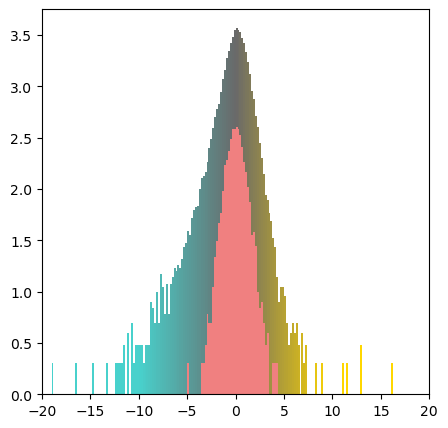

In [22]:
interaction_hist(dmso1_map,dmso1_map_geneneg,gi_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/dmso1_distribution.png',dpi=300)

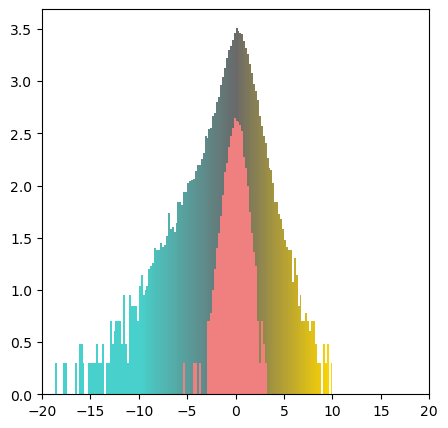

In [23]:
interaction_hist(atr_map,atr_map_geneneg,gi_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/atr_distribution.png',dpi=300)

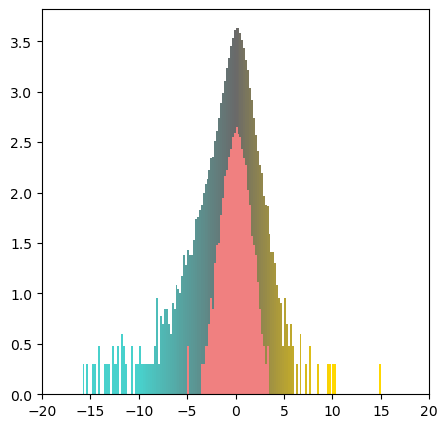

In [24]:
interaction_hist(dmso2_map,dmso2_map_geneneg,gi_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/dmso2_distribution.png',dpi=300)

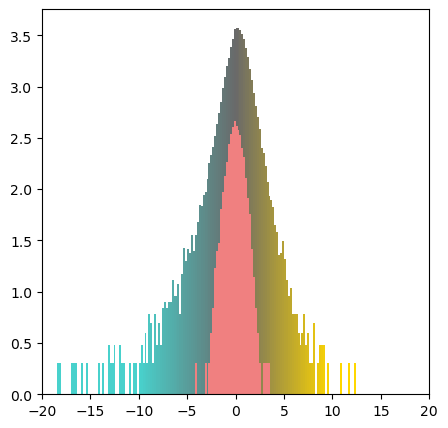

In [25]:
interaction_hist(etop_map,etop_map_geneneg,gi_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/etop_distribution.png',dpi=300)

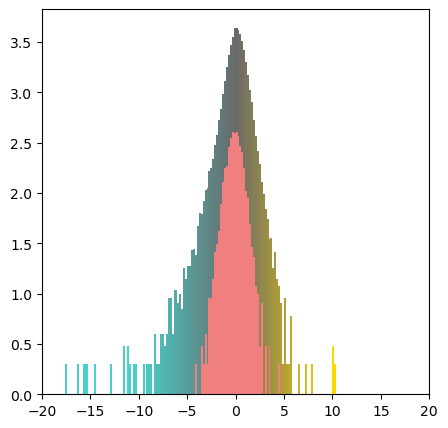

In [26]:
interaction_hist(keto_map,keto_map_geneneg,gi_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/keto_distribution.png',dpi=300)

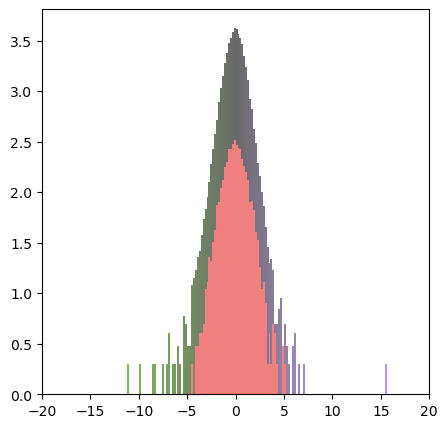

In [28]:
interaction_hist(dmso_di_map,dmso_di_geneneg,di_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/dmso_di_distribution.png',dpi=300)

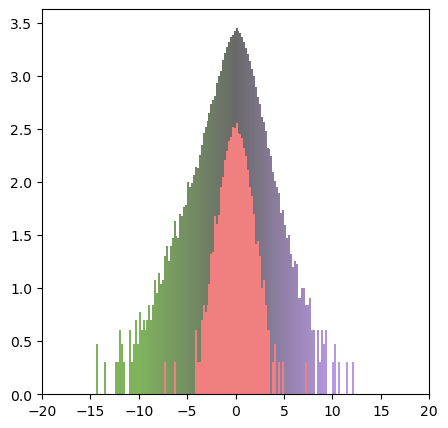

In [29]:
interaction_hist(atr_di_map,atr_di_geneneg,di_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/atr_di_distribution.png',dpi=300)

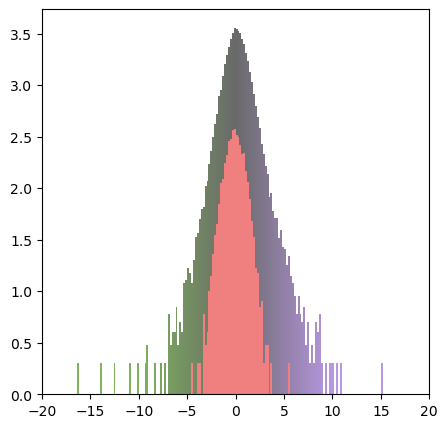

In [30]:
interaction_hist(etop_di_map,etop_di_geneneg,di_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/etop_di_distribution.png',dpi=300)

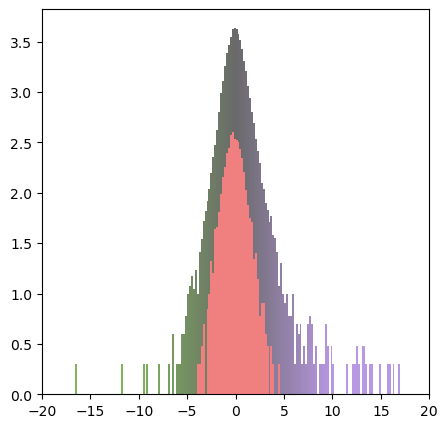

In [31]:
interaction_hist(keto_di_map,keto_di_geneneg,di_cmap,200)
#plt.savefig('/Users/benh/Desktop/for_figs/keto_di_distribution.png',dpi=300)

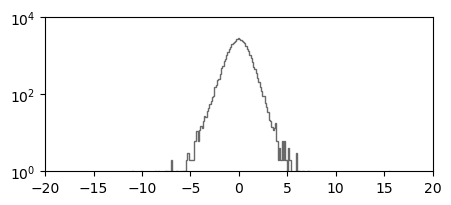

In [72]:
## Plot dGI distributions in the step style to so compare easily across all 
plt.figure(figsize=(5,2))
plt.hist(upperTriangle(dmso_di_map),bins=200,color = 'dimgray',log=True,histtype='step')
#plt.hist(upperTriangle(atr_di_map),bins=200,color = 'lightcoral',log=True,histtype='step')
#plt.hist(upperTriangle(etop_di_map),bins=200,color = 'mediumturquoise',log=True,histtype='step')
#plt.hist(upperTriangle(keto_di_map),bins=200,color = 'forestgreen',log=True,histtype='step')
plt.xlim(-20,20)
plt.ylim(1,10000)
#plt.savefig('/Users/benh/Desktop/for_figs/dmso_di_kde.png',dpi=300)

In [32]:
## We're going to calculate differential maps for the thre environmental maps using the non-matched reference and see how well these scores
## correlate with the normal GI maps. This is meant to control for batch effects

atr_di_map2 = atr_map-dmso2_map
etop_di_map2 = etop_map-dmso1_map
keto_di_map2 = keto_map-dmso1_map

pearsonr = 0.8348676487256578


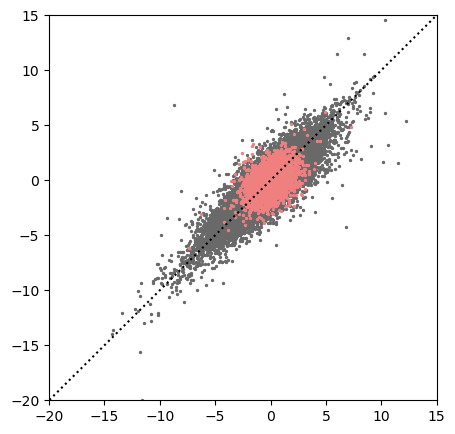

In [69]:
## ATR dGI normal -vs- unmatched

plt.figure(figsize = (5,5))
plt.scatter(upperTriangle(atr_di_map),upperTriangle(atr_di_map2),s=2,c= 'dimgray')
plt.scatter(atr_di_geneneg,(atr_map_geneneg-dmso2_map_geneneg),s=2,c='lightcoral')


plt.plot((-25,15),(-25,15),':',color='black')
plt.xlim(-20,15)
plt.ylim(-20,15)
print('pearsonr = '+str(stats.pearsonr(upperTriangle(atr_di_map),upperTriangle(atr_di_map2))[0]))
plt.savefig('/Users/benh/Desktop/molcell_figs/plots/atr_matched-vs-unmatched.png',dpi=300)

pearsonr = 0.7307086498257122


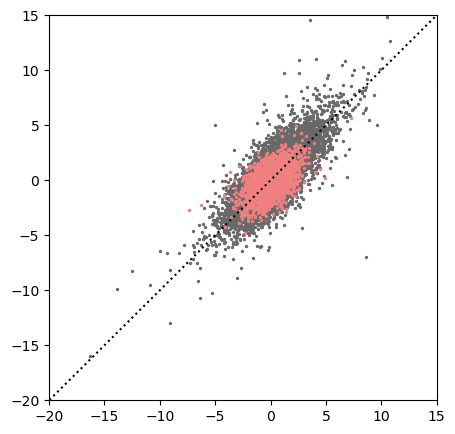

In [68]:
## ATR dGI normal -vs- unmatched

plt.figure(figsize = (5,5))
plt.scatter(upperTriangle(etop_di_map),upperTriangle(etop_di_map2),s=2,c= 'dimgray')
plt.scatter(atr_di_geneneg,(etop_map_geneneg-dmso1_map_geneneg),s=2,c='lightcoral')


plt.plot((-25,15),(-25,15),':',color='black')
plt.xlim(-20,15)
plt.ylim(-20,15)
print('pearsonr = '+str(stats.pearsonr(upperTriangle(etop_di_map),upperTriangle(etop_di_map2))[0]))
plt.savefig('/Users/benh/Desktop/molcell_figs/plots/etop_matched-vs-unmatched.png',dpi=300)

pearsonr = 0.6561129407949445


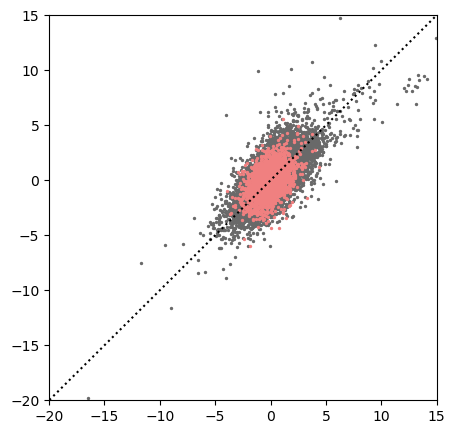

In [70]:
## ATR dGI normal -vs- unmatched

plt.figure(figsize = (5,5))
plt.scatter(upperTriangle(keto_di_map),upperTriangle(keto_di_map2),s=2,c= 'dimgray')
plt.scatter(keto_di_geneneg,(keto_map_geneneg-dmso1_map_geneneg),s=2,c='lightcoral')


plt.plot((-25,15),(-25,15),':',color='black')
plt.xlim(-20,15)
plt.ylim(-20,15)
print('pearsonr = '+str(stats.pearsonr(upperTriangle(keto_di_map),upperTriangle(keto_di_map2))[0]))

plt.savefig('/Users/benh/Desktop/molcell_figs/plots/keto_matched-vs-unmatched.png',dpi=300)